In [210]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,OrdinalEncoder

import folium
import plotly.express as px

In [211]:
df_bmw=pd.read_csv("bmw_pricing_v3.csv")
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [212]:
# Cambiamos las columnas de fecha registro y fecha venta a tipo datetime.
for i in ["fecha_registro","fecha_venta"]:
    df_bmw[i]=pd.to_datetime(df_bmw[i])
    

df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4357 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  1452 non-null 

In [213]:
# Eliminamos la columna de marca, ya que no nos aporta mucha información.
df_bmw.drop('marca',axis=1,inplace=True)

df_bmw.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [214]:
# Filtamos estas columnas para dejar solo los valores sin nulos. Guardamos los cambios en un nuevo dataset. 
columnas_a_limpiar = ['modelo', 'km','potencia','tipo_gasolina','volante_regulable','camara_trasera','elevalunas_electrico','precio','fecha_venta']
df2_bmw = df_bmw.dropna(subset=columnas_a_limpiar)

df2_bmw.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2409
tipo_gasolina                     0
color                           442
tipo_coche                     1449
volante_regulable                 0
aire_acondicionado              482
camara_trasera                    0
asientos_traseros_plegables    3373
elevalunas_electrico              0
bluetooth                       725
gps                               0
alerta_lim_velocidad            725
precio                            0
fecha_venta                       0
dtype: int64

In [215]:
df3_bmw = df2_bmw.copy()

<Axes: >

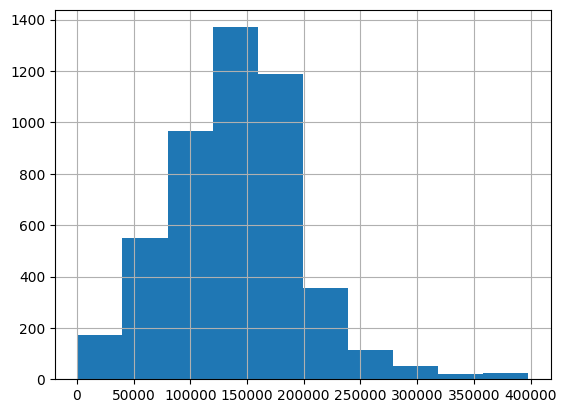

In [216]:
# Quitamos los outliers de la columna 'km'. 
df3_bmw.drop(df3_bmw[((df3_bmw["km"]<0) | (df3_bmw["km"]>400000))].index, inplace=True)

df3_bmw['km'].hist()

In [ ]:
# Bucle para ver en general las columnas. 
'''for i in df3_bmw:
  if (df3_bmw[i].dtype.kind == "O") or (df3_bmw[i].dtype.kind == "B"):
    print(i,'\n', df3_bmw[i].value_counts(), '\n')
  elif (df3_bmw[i].dtype.kind=="f") or (df3_bmw[i].dtype.kind=="i"):
    print(df3_bmw.hist(i))'''

In [217]:
df4_bmw = df3_bmw.copy()

<Axes: >

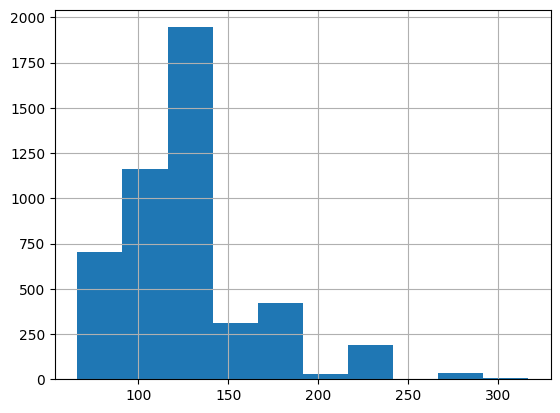

In [218]:
# Quitamos los outliers de la columna 'potencia'. 
df4_bmw.drop(df4_bmw[((df4_bmw["potencia"]<=50) | (df4_bmw["potencia"]>=400))].index, inplace=True)

df4_bmw['potencia'].hist()

<Axes: >

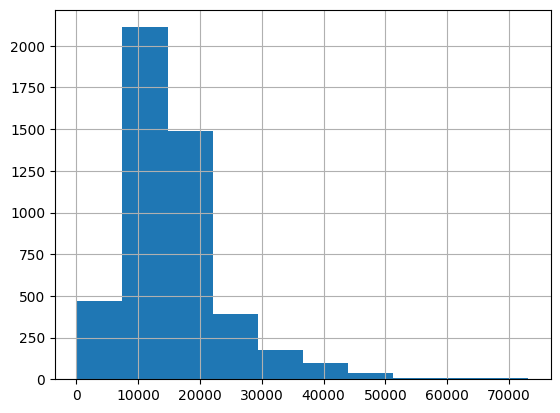

In [219]:
# Quitamos los outliers de la columna 'precio'. 
df4_bmw.drop(df4_bmw[((df4_bmw["precio"]<=100) | (df4_bmw["precio"]>=75000))].index, inplace=True)

df4_bmw['precio'].hist()

In [220]:
# Eliminamos la columna de fecha registro, ya que tenemos el 50 % de valores nulos. 
df4_bmw.drop('fecha_registro',axis=1,inplace=True)

df4_bmw.isnull().sum()

modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                           441
tipo_coche                     1443
volante_regulable                 0
aire_acondicionado              481
camara_trasera                    0
asientos_traseros_plegables    3357
elevalunas_electrico              0
bluetooth                       721
gps                               0
alerta_lim_velocidad            721
precio                            0
fecha_venta                       0
dtype: int64

In [221]:
# Cambiamos los valores nulos de las columnas de color y tipo coche, por 'sin especificar'.
df4_bmw["color"].fillna("sin especificar", inplace=True)
df4_bmw["tipo_coche"].fillna('sin especificar', inplace=True)

df4_bmw.isnull().sum()

modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                             0
tipo_coche                        0
volante_regulable                 0
aire_acondicionado              481
camara_trasera                    0
asientos_traseros_plegables    3357
elevalunas_electrico              0
bluetooth                       721
gps                               0
alerta_lim_velocidad            721
precio                            0
fecha_venta                       0
dtype: int64

In [222]:
df5_bmw = df4_bmw.copy()

In [223]:
# Guardamos el dataframe en un pickle para así poder seguir el día siguiente sin tener que ejecutar todo. 
pd.to_pickle(df5_bmw,"C:/Users/mitev/Desktop/Simeon/NUCLIO DIGITAL SCHOOL/Entregables/Primer entregable/practica_entregable_Simeon_Mitev_PK")

In [314]:
# Ejecutamos el pickle y creamos una nueva variable. 
df_bmw_rec=pd.read_pickle("practica_entregable_Simeon_Mitev_PK")

In [315]:
# Eliminamos la columna de asientos traseros plegables ya que tiene más valores nulos que valores con información. 
df_bmw_rec.drop('asientos_traseros_plegables',axis=1,inplace=True)

In [316]:
# Sustituyo los valores nulos de estas columnas por su mediana.
df_bmw_rec["aire_acondicionado"].fillna(df_bmw_rec["aire_acondicionado"].median(),inplace=True)
df_bmw_rec["bluetooth"].fillna(df_bmw_rec["bluetooth"].median(),inplace=True)
df_bmw_rec["alerta_lim_velocidad"].fillna(df_bmw_rec["alerta_lim_velocidad"].median(),inplace=True)


In [317]:
df_bmw_rec.drop('modelo',axis=1,inplace=True)

df_bmw_rec.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,140411.0,100.0,diesel,black,sin especificar,True,True,False,True,0.0,True,1.0,11300.0,2018-01-01
1,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
2,183297.0,120.0,diesel,white,sin especificar,False,False,False,True,False,True,False,10200.0,2018-02-01
3,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,1.0,25100.0,2018-02-01
4,97097.0,160.0,diesel,silver,sin especificar,True,True,False,False,True,True,True,33400.0,2018-04-01


In [318]:
df_bmw_rec["tipo_gasolina"].value_counts()

tipo_gasolina
diesel           4595
petrol            189
Diesel              5
hybrid_petrol       5
electro             3
Name: count, dtype: int64

In [319]:
valores_a_eliminar = ['Diesel', 'hybrid_petrol', 'electro']
df_bmw_rec = df_bmw_rec[~df_bmw_rec['tipo_gasolina'].isin(valores_a_eliminar)]
df_bmw_rec['tipo_gasolina'].replace(valores_a_eliminar, inplace=True)

C:\Users\mitev\AppData\Local\Temp\ipykernel_18384\655161395.py:3: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_bmw_rec['tipo_gasolina'].replace(valores_a_eliminar, inplace=True)


In [320]:
df_bmw_rec["tipo_gasolina"].value_counts()

tipo_gasolina
diesel    4595
petrol     189
Name: count, dtype: int64

In [321]:
df_bmw_rec["tipo_gasolina"]=np.where(df_bmw_rec["tipo_gasolina"]=="diesel",0,1 )

In [322]:
df_bmw_rec.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,140411.0,100.0,0,black,sin especificar,True,True,False,True,0.0,True,1.0,11300.0,2018-01-01
1,13929.0,317.0,1,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
2,183297.0,120.0,0,white,sin especificar,False,False,False,True,False,True,False,10200.0,2018-02-01
3,128035.0,135.0,0,red,convertible,True,True,False,True,True,True,1.0,25100.0,2018-02-01
4,97097.0,160.0,0,silver,sin especificar,True,True,False,False,True,True,True,33400.0,2018-04-01


In [323]:
df_bmw_rec['color'].value_counts()

color
black              1480
grey               1057
blue                637
white               477
sin especificar     441
brown               301
silver              288
red                  46
beige                37
green                14
orange                6
Name: count, dtype: int64

In [ ]:
# PRIMERA VISUALIZACIÓN DE CORRELACIONES ENTRE COLUMNAS 
corr = df_bmw_rec.corr()

corr.style.background_gradient(cmap='coolwarm')